In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   version        280 non-null    category
 1   type           280 non-null    object  
 2   sample         280 non-null    int64   
 3   n              280 non-null    int64   
 4   time(s)        280 non-null    float64 
 5   Normalized_ns  280 non-null    float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 11.5+ KB
//////////////// summary data  ////////////////////////////////
            min      max  median      mean       std        var
version                                                        
 ver1    3.5219   5.8003  3.9360  4.325320  0.824180   0.679273
 ver3    3.8017   8.3375  4.1775  4.956749  1.515976   2.298182
 ver4    3.2154   3.3556  3.2276  3.235377  0.023379   0.000547
 ver5    3.9650  14.0726  6.7793  8.176121  4.002992  16.023943

error (ns) 

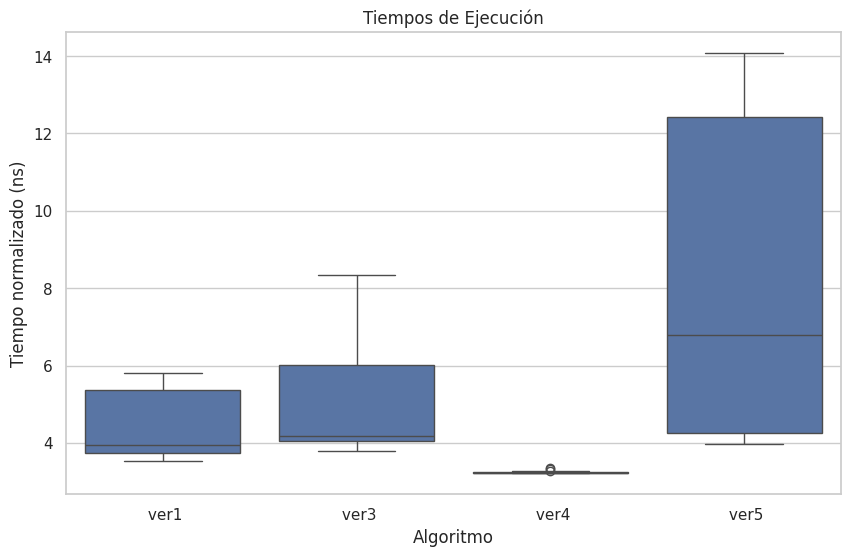


===========          TABLA ANOVA         ================
                 sum_sq     df          F        PR(>F)
C(version)   947.691227    3.0  66.497841  2.170737e-32
Residual    1311.134183  276.0        NaN           NaN
 
Estadística de prueba F: 66.49784136979532
Valor p: 2.170736554083189e-32
alpha: 0.05
================= -------------- =========================

======================================     filtrar datos Ver1 ver3  ==============================
   version type  sample    n  time(s)  Normalized_ns
50    ver1    f       0  450    0.337         3.6982
51    ver1    f       1  450    0.340         3.7311
52    ver1    f       2  450    0.334         3.6653
53    ver1    f       3  450    0.339         3.7202
54    ver1    f       4  450    0.340         3.7311
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 50 to 259
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   version 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)


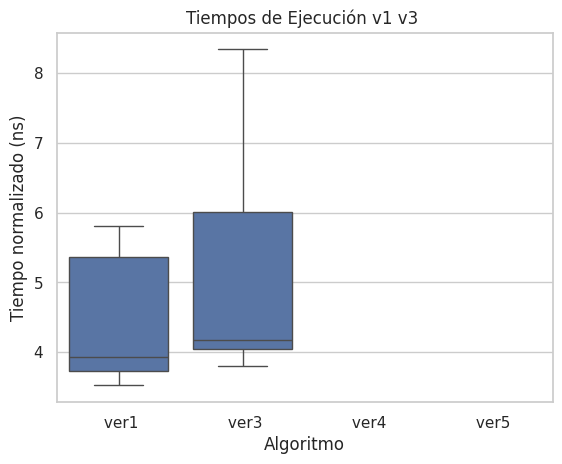



===========          ANOVA Ver1 - ver3     ================
                sum_sq     df         F    PR(>F)
C(version)   41.863714    3.0  9.373489  0.002647
Residual    205.444408  138.0       NaN       NaN
 
Estadística de prueba F: 9.373488786521142
Valor p: 0.002646783971266499
alpha: 0.05
================= ----------------- =========================

END
===========          TABLA ANOVA Two ways         ================
                     sum_sq     df             F         PR(>F)
C(version)       947.691227    3.0  34629.460517   0.000000e+00
C(n)             634.839452    6.0  11598.792470  1.325802e-304
C(version):C(n)  673.995935   18.0   4104.732805  1.815549e-299
Residual           2.298796  252.0           NaN            NaN
 
Valor p para C(version): 0.0
Valor p para C(n): 1.3258018506342845e-304
Valor p para la interacción: 1.8155487879466166e-299
alpha: 0.05
================= -------------- =========================



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)
<ipython-input-5-5c908bc6af59>:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='n', y='Normalized_ns', hue='version', kind='point', data=df, ci=None)


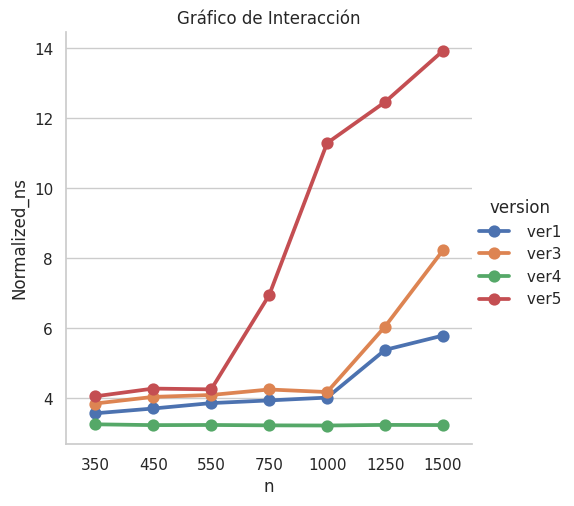

In [5]:
from google.colab import drive
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import numpy as np

#!pip install researchpy
#import researchpy as rp
# @ load data
#drive.mount('/content/drive/')
#filename = 'Data_S2.xlsx'
#search_path = '/content/drive/My Drive/'
#file_path = os.path.join(search_path, filename)

file_path='/content/drive/MyDrive/University/Quinto_Semestre/LAB-Arqui-compu/S4/ReporteDatosSem4_regresion.xlsx'
df = pd.read_excel(file_path,'Datos')

df = df.rename(columns={"Normalized(ns)":"Normalized_ns"})
df['version'] = pd.Categorical(df['version'])
df.info()

# @ summary data
print("//////////////// summary data  ////////////////////////////////")
Z=1.96
#E=np.sqrt()
Stat_data=df[["Normalized_ns", "version"]].groupby("version").agg({"Normalized_ns":["min", "max", "median", "mean" ,np.std,np.var]})
Stat_data=Stat_data.Normalized_ns
print(Stat_data)
Error=Stat_data['mean']/100  # 1%
print("")
print("error (ns) al 1% ")
print(Error)

print("Tamaño de muestra ")
print(Stat_data['var']*(Z*Z)/(Error*Error))
#print(rp.summary_cont(df['Normalized_ns']))
#print(rp.summary_cont(df['Normalized_ns'].groupby(df['version'])))
print(" **")

# "//////////////// Gráfico de Cajas y Bigotes ////////////////////////////////")
sns.set(style="whitegrid")  # Establecer el estilo del gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Crear el gráfico de cajas y bigotes
sns.boxplot(x='version', y='Normalized_ns', data=df)
# Etiquetas y título
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo normalizado (ns)')
plt.title('Tiempos de Ejecución')
# Mostrar el gráfico
plt.show()
print("")

modelo = ols('Normalized_ns ~ C(version)', alpha=0.05, data=df).fit()
# Mostrar los resultados
print("===========          TABLA ANOVA         ================")
tabla_anova = anova_lm(modelo, typ=2) # Type 2 ANOVA DataFrame
print(tabla_anova)
print(" ")
print("Estadística de prueba F:", modelo.fvalue)
print("Valor p:", modelo.f_pvalue)
print("alpha: 0.05")
print("================= -------------- =========================")
print("")

print("======================================     filtrar datos Ver1 ver3  ==============================")
df_v4_6 = df[df['version'].isin([' ver1', ' ver3'])]
print(df_v4_6.head())
df_v4_6.info()

# Crear el gráfico de cajas y bigotes
sns.boxplot(x='version', y='Normalized_ns', data=df_v4_6)
# Etiquetas y título
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo normalizado (ns)')
plt.title('Tiempos de Ejecución v1 v3 ')
# Mostrar el gráfico
plt.show()
print("")
#print(rp.summary_cont(df_v2_5['Normalized_ns']))
print("")
#print(rp.summary_cont(df_v2_5['Normalized_ns'].groupby(df_v4_6['version'])))
print("===========          ANOVA Ver1 - ver3     ================")
modelo4_6 = ols('Normalized_ns ~ C(version)', alpha=0.05, data=df_v4_6).fit()
tabla_anova = anova_lm(modelo4_6, typ=2) # Type 2 ANOVA DataFrame
print(tabla_anova)
print(" ")
print("Estadística de prueba F:", modelo4_6.fvalue)
print("Valor p:", modelo4_6.f_pvalue)
print("alpha: 0.05")

print("================= ----------------- =========================")
print("")
print("END")

modeloTwoWay = ols('Q("Normalized_ns") ~ C(version) + C(n) + C(version) * C(n)', alpha=0.05, data=df).fit()
# Mostrar los resultados
print("===========          TABLA ANOVA Two ways         ================")
tabla_anova = anova_lm(modeloTwoWay , typ=2) # Type 2 ANOVA DataFrame
print(tabla_anova)
print(" ")
print("Valor p para C(version):", tabla_anova.loc['C(version)', 'PR(>F)'])
print("Valor p para C(n):", tabla_anova.loc['C(n)', 'PR(>F)'])
print("Valor p para la interacción:", tabla_anova.loc['C(version):C(n)', 'PR(>F)'])
print("alpha: 0.05")
print("================= -------------- =========================")
print("")
# Creamos la gráfica de interacciones
sns.catplot(x='n', y='Normalized_ns', hue='version', kind='point', data=df, ci=None)
plt.title('Gráfico de Interacción')
plt.show()



pip install statsmodels

In [ ]:
researchpy

In [ ]:
# prompt: pi install researchpy

!pip install researchpy


#   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   version          36 non-null     object
 1   type             36 non-null     object
 2   sample           36 non-null     int64  
 3   n                36 non-null     int64  
 4   Time (s)         36 non-null     float64
 5   Normalized (ns)  36 non-null     int64  

In [ ]:
pip install researchpy


In [ ]:
pip install researchpy

In [ ]:
pip install statsmodels
